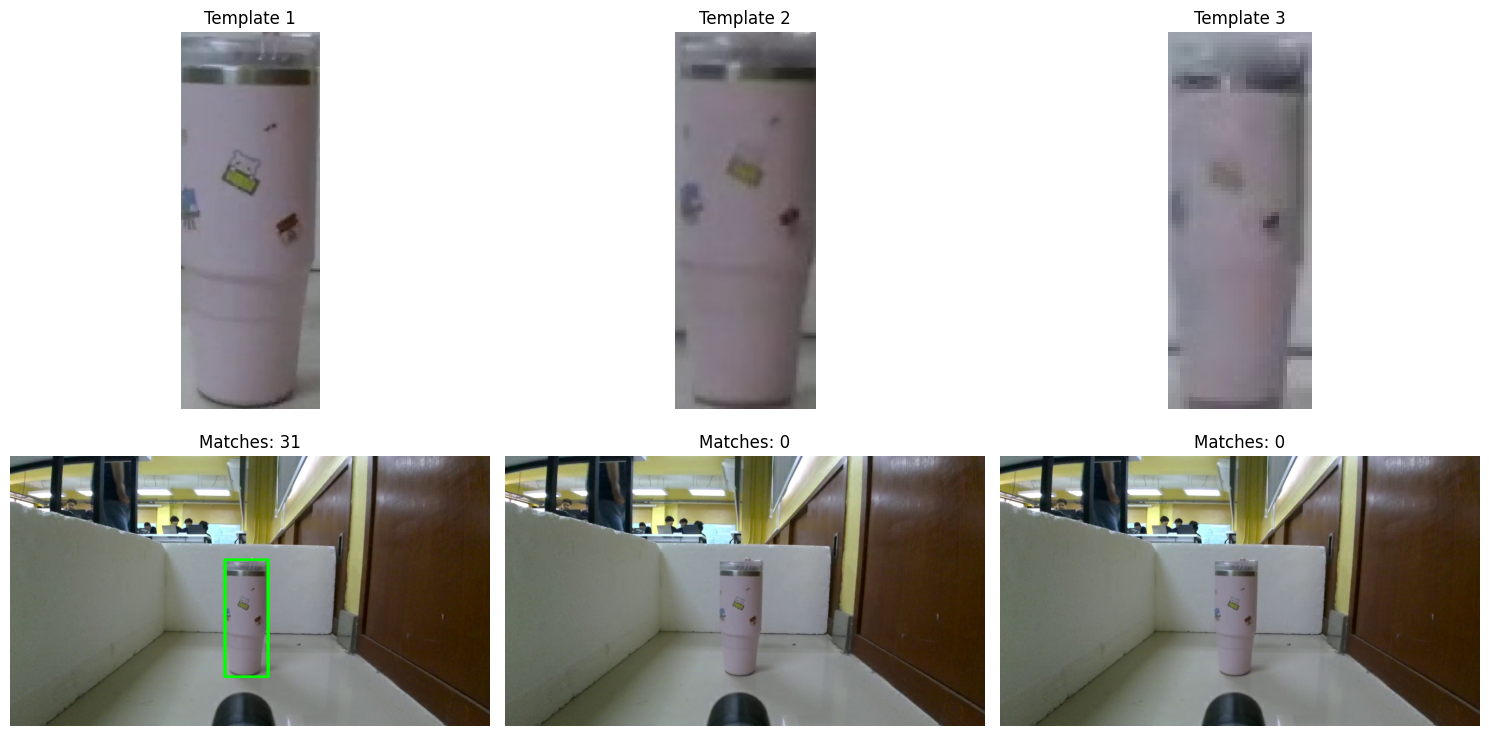

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. โหลดภาพหลัก
# ------------------------------
image = cv2.imread("C:/Users/User/.vscode/AI2.1/robot/work/image/capture_1756180004.jpg")
if image is None:
    raise FileNotFoundError("main_image.jpg not found")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ------------------------------
# 2. โหลด template สามชุด
# ------------------------------

template1 = "C:/Users/User/.vscode/AI2.1/robot/work/image/template/template_pic1_x_573_y_276_w_115_h_312.jpg"
template2 = "C:/Users/User/.vscode/AI2.1/robot/work/image/template/template_pic2_x_634_y_291_w_50_h_134.jpg"
template3 = "C:/Users/User/.vscode/AI2.1/robot/work/image/template/template_pic3_x_629_y_291_w_35_h_92.jpg"

template_files = [template1, template2, template3]
templates = []
for f in template_files:
    tmpl = cv2.imread(f)
    if tmpl is None:
        raise FileNotFoundError(f"{f} not found")
    templates.append(cv2.cvtColor(tmpl, cv2.COLOR_BGR2RGB))

# ------------------------------
# 3. ฟังก์ชัน matching RGB + multiple detections
# ------------------------------
def match_template_multiple(img, tmpl, threshold=0.8):
    # แยก channel แล้ว match เฉลี่ยผลลัพธ์
    results = []
    for c in range(3):  # R,G,B
        res = cv2.matchTemplate(img[:,:,c], tmpl[:,:,c], cv2.TM_CCOEFF_NORMED)
        results.append(res)
    result = np.mean(results, axis=0)

    # หา location ที่ score >= threshold
    locations = np.where(result >= threshold)
    boxes = []
    h, w, _ = tmpl.shape
    for pt in zip(*locations[::-1]):  # แปลง (row, col) -> (x, y)
        boxes.append((pt, (pt[0]+w, pt[1]+h)))
    return boxes, result

# ------------------------------
# 4. ทำ matching สำหรับทุก template
# ------------------------------
threshold = 0.9
matched_results = []
for tmpl in templates:
    boxes, result = match_template_multiple(image_rgb, tmpl, threshold)
    
    img_copy = image_rgb.copy()
    for top_left, bottom_right in boxes:
        cv2.rectangle(img_copy, top_left, bottom_right, (0, 255, 0), 2)
    
    matched_results.append((img_copy, tmpl, len(boxes)))

# ------------------------------
# 5. แสดงผลด้วย subplot
# ------------------------------
plt.figure(figsize=(15, 8))
for i, (img_res, tmpl_res, n_boxes) in enumerate(matched_results):
    # แถวบน: template
    plt.subplot(2, len(matched_results), i+1)
    plt.imshow(tmpl_res)
    plt.title(f"Template {i+1}")
    plt.axis("off")
    
    # แถวล่าง: ผล matching บนภาพ
    plt.subplot(2, len(matched_results), i+1+len(matched_results))
    plt.imshow(img_res)
    plt.title(f"Matches: {n_boxes}")
    plt.axis("off")

plt.tight_layout()
plt.show()


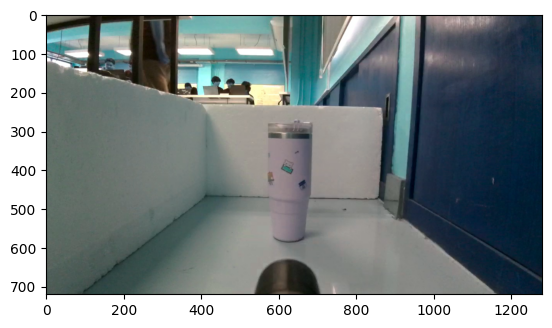

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. โหลดภาพหลักและแปลงเป็น RGB
# ------------------------------
image = cv2.imread("capture_1756180004.jpg")
plt.imshow(image)
plt.show()